Suppose that each $y^{(i)}$ and $x^{(i)}$ are conditionally independent given $t^{(i)}$, that is

$$
p(y^{(i)} = 1 \mid t^{(i)} = 1, x^{(i)}) = p(y^{(i)} = 1 \mid t^{(i)} = 1)
$$


Then

\[
\begin{aligned}
p(y^{(i)} \mid x^{(i)}) &= \sum_{t^{(i)}} p(y^{(i)} = 1, t^{(i)} \mid x^{(i)}) \\
&= p(y^{(i)} = 1, t^{(i)} = 1 \mid x^{(i)}) + p(y^{(i)} = 1, t^{(i)} = 0 \mid x^{(i)}) \\
&= p(y^{(i)} = 1, t^{(i)} = 1 \mid x^{(i)}) + 0 \\
&= p(y^{(i)} = 1 \mid t^{(i)} = 1, x^{(i)}) \cdot p(t^{(i)} = 1 \mid x^{(i)}) \\
&= p(y^{(i)} = 1 \mid t^{(i)} = 1) \cdot p(t^{(i)} = 1 \mid x^{(i)}) \\
&= \alpha \cdot p(t^{(i)} = 1 \mid x^{(i)})
\end{aligned}
\]

Therefore,

$$
p(t^{(i)} = 1 \mid x^{(i)}) = \frac{p(y^{(i)} \mid x^{(i)})}{\alpha}, \quad \text{where } \alpha = p(y^{(i)} = 1 \mid t^{(i)} = 1)
$$


In [63]:
import sys
import os

# Assuming you're running from CS229 directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import numpy as np
import pandas as pd
import util

from PS1.Ques1.python_files.logistic import LogisticRegression

# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')

    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
     # Make sure to save outputs to pred_path_c
    clf = LogisticRegression()
    train_data = pd.read_csv(train_path)
    valid_data = pd.read_csv(valid_path)
    test_data = pd.read_csv(test_path)
    #Loaded Training Data
    true_labels_train = train_data['t'].values
    true_features_train = train_data.drop(columns=['t', 'y']).values
    
    new_training_data = np.zeros((true_features_train.shape[0], true_features_train.shape[1] + 1), dtype=true_features_train.dtype)

    new_training_data[:, 0] = 1
    new_training_data[:, 1:] = true_features_train
    
    clf.fit(new_training_data, true_labels_train)

    test_features = test_data.drop(columns=['t', 'y']).values
    new_test_features = np.zeros((test_features.shape[0], test_features.shape[1] + 1), dtype=test_features.dtype)
    new_test_features[:, 0] = 1
    new_test_features[:, 1:] = test_features

    y_pred = clf.predict(new_test_features)
    # Save predictions to pred_path_c
    np.savetxt(pred_path_c, y_pred, fmt='%d', delimiter=',')

    true_labels_test = test_data['t'].values
    accuracy = np.mean(y_pred == true_labels_test)
    print(f"Accuracy on test set: {accuracy:.4f}")

    util.plot(new_test_features, true_labels_test, clf.theta, pred_path_c.replace('.csv', '.png'))


    


    

Accuracy on test set: 0.9839


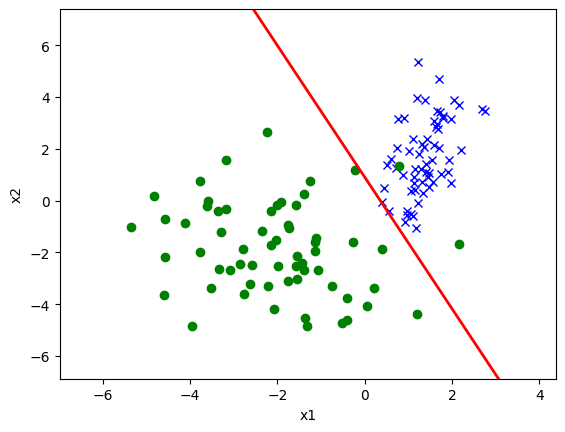

In [64]:
if __name__ == '__main__':
    train_path = "./data/ds3_train.csv"
    valid_path = "./data/ds3_valid.csv"
    test_path = "./data/ds3_test.csv"
    pred_path = "./data/predictions/predictions_{}.csv".format(WILDCARD)

    main(train_path, valid_path, test_path, pred_path)


Accuracy on test set (y-labels): 0.5000


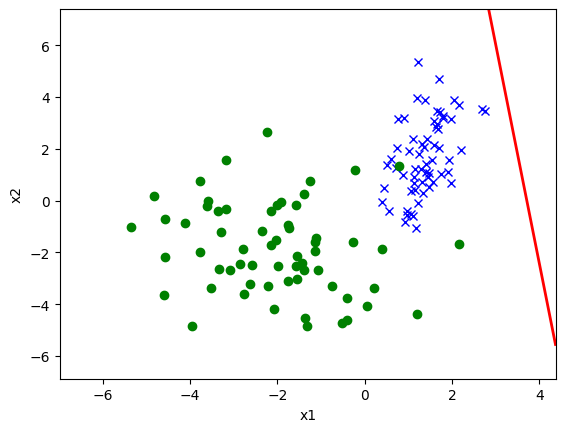

In [65]:
# Part (d): Train on y-labels and test on true labels
# Make sure to save outputs to pred_path_d
WILDCARD = 'X'


def main2(train_path, valid_path, test_path, pred_path):
    pred_path_d = pred_path.replace(WILDCARD, 'd')

    clf_d = LogisticRegression()
    training_data_d = pd.read_csv(train_path)
    labels_train_d = training_data_d['y'].values
    features_train_d = training_data_d.drop(columns=['t', 'y']).values

    new_features_train_d = np.zeros((features_train_d.shape[0], features_train_d.shape[1] + 1), dtype=features_train_d.dtype)
    new_features_train_d[:, 0] = 1
    new_features_train_d[:, 1:] = features_train_d

    clf_d.fit(new_features_train_d, labels_train_d)

    test_data_d = pd.read_csv(test_path)
    features_test_d = test_data_d.drop(columns=['t', 'y']).values
    new_features_test_d = np.zeros((features_test_d.shape[0], features_test_d.shape[1] + 1), dtype=features_test_d.dtype)
    new_features_test_d[:, 0] = 1
    new_features_test_d[:, 1:] = features_test_d

    y_pred_d = clf_d.predict(new_features_test_d)

    np.savetxt(pred_path_d, y_pred_d, fmt='%d', delimiter=',')

    true_labels_test_d = test_data_d['t'].values
    accuracy_d = np.mean(y_pred_d == true_labels_test_d)
    print(f"Accuracy on test set (y-labels): {accuracy_d:.4f}")

    util.plot(new_features_test_d, true_labels_test_d, clf_d.theta, pred_path_d.replace('.csv', '.png'))

if __name__ == '__main__':
    train_path = "./data/ds3_train.csv"
    valid_path = "./data/ds3_valid.csv"
    test_path = "./data/ds3_test.csv"
    pred_path = "./data/predictions/predictions_{}.csv".format(WILDCARD)

    main2(train_path, valid_path, test_path, pred_path)


Correction factor alpha: 0.1717
Accuracy on test set (with correction factor): 0.9516


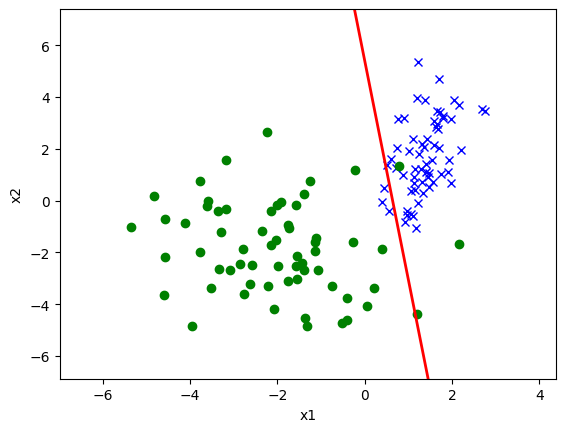

In [87]:
# Part (e): Apply correction factor using validation set and test on true labels
# Plot and use np.savetxt to save outputs to pred_path_e
WILDCARD = 'X'
def main3(train_path, valid_path, test_path, pred_path):
    pred_path_e = pred_path.replace(WILDCARD, 'e')
    clf_e = LogisticRegression()

    training_features, training_labels = util.load_dataset(train_path, label_col='y', add_intercept=True)
    valid_features, labels_valid = util.load_dataset(valid_path, label_col='y', add_intercept=True)

    clf_e.fit(training_features, training_labels)

    h_theta_valid = 1/ (1 + np.exp(-(clf_e.theta.T @ valid_features.T)))
    sum  = 0
    for i in range(len(labels_valid)):
        if labels_valid[i] == 1:
            sum += h_theta_valid[i]
    alpha = sum / np.sum(labels_valid == 1)
    print(f"Correction factor alpha: {alpha:.4f}")

    test_features, test_labels = util.load_dataset(test_path, label_col='t', add_intercept=True)
    
    probs_test = 1/(1 + np.exp(-(clf_e.theta.T @ test_features.T)))

    probs_test_corrected = probs_test / alpha
    h_theta_test = (probs_test_corrected >= 0.5).astype(int)

    np.savetxt(pred_path_e, h_theta_test, fmt='%d', delimiter=',')
    
    accuracy_e = np.mean(h_theta_test == test_labels)
    print(f"Accuracy on test set (with correction factor): {accuracy_e:.4f}")

    util.plot(test_features, test_labels, clf_e.theta, pred_path_e.replace('.csv', '.png'), correction= alpha)

if __name__ == '__main__':
    train_path = "./data/ds3_train.csv"
    valid_path = "./data/ds3_valid.csv"
    test_path = "./data/ds3_test.csv"
    pred_path = "./data/predictions/predictions_{}.csv".format(WILDCARD)
    main3(train_path, valid_path, test_path, pred_path)
# *** END CODER HERE


Correction factor alpha: 0.1617
Accuracy on test set (with correction factor): 0.9435


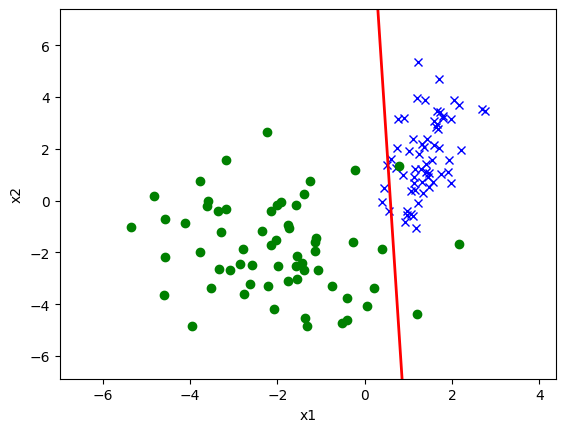

In [ ]:
 '''
# Part (e): Apply correction factor using validation set and test on true labels
# Plot and use np.savetxt to save outputs to pred_path_e
WILDCARD = 'X'
def main3(train_path, valid_path, test_path, pred_path):
    pred_path_e = pred_path.replace(WILDCARD, 'e')
    clf_e = LogisticRegression()

    validation_data = pd.read_csv(valid_path)
    labels_valid = validation_data['y'].values

    features_valid = validation_data.drop(columns=['t', 'y']).values
    new_features_valid = np.zeros((features_valid.shape[0], features_valid.shape[1] + 1), dtype=features_valid.dtype)
    new_features_valid[:, 0] = 1
    new_features_valid[:, 1:] = features_valid

    clf_e.fit(new_features_valid, labels_valid)
    
    h_theta = (clf_e.theta.T) @ (new_features_valid.T)
    h_theta = 1 / (1 + np.exp(-h_theta)) 
    sum = 0
    for i in range(len(labels_valid)):
        if labels_valid[i] == 1:
            sum += h_theta[i]
    count = np.sum(labels_valid == 1)
    alpha = sum / count if count > 0 else 1.0  # Avoid division by zero

    print(f"Correction factor alpha: {alpha:.4f}")

    

    test_data = pd.read_csv(test_path)
    # Loaded Test Data
    true_labels_test = test_data['t'].values
    features_test = test_data.drop(columns=['t', 'y']).values
    new_features_test = np.zeros((features_test.shape[0], features_test.shape[1] + 1), dtype=features_test.dtype)
    new_features_test[:, 0] = 1
    new_features_test[:, 1:] = features_test


    h_theta_test = (clf_e.theta.T) @ (new_features_test.T)
    h_theta_test = 1 / (1 + np.exp(-h_theta_test))
    h_theta_test = h_theta_test / alpha
    h_theta_test = np.where(h_theta_test >= 0.5, 1, 0)

    np.savetxt(pred_path_e, h_theta_test, fmt='%d', delimiter=',')
    accuracy_e = np.mean(h_theta_test == true_labels_test)
    print(f"Accuracy on test set (with correction factor): {accuracy_e:.4f}")
    util.plot(new_features_test, true_labels_test, clf_e.theta, pred_path_e.replace('.csv', '.png'), correction=alpha)

if __name__ == '__main__':
    train_path = "./data/ds3_train.csv"
    valid_path = "./data/ds3_valid.csv"
    test_path = "./data/ds3_test.csv"
    pred_path = "./data/predictions/predictions_{}.csv".format(WILDCARD)
    main3(train_path, valid_path, test_path, pred_path)
# *** END CODER HERE
'''